In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("/content/CRIME_REVIEW_FOR_THE_MONTH_OF_MARCH_2024.csv")
df = df.iloc[:686]
df

,Sl. No.,Heads of Crime,Major Head,Minor head,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month
0,1,A - IPC Crime,Murder (Sec.302/303 IPC),For gain,7,0,2,2
1,2,A - IPC Crime,Murder (Sec.302/303 IPC),Over Property Dispute,9,0,6,1
2,3,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Personal Vendetta or enemity,4,2,1,2
3,4,A - IPC Crime,Murder (Sec.302/303 IPC),Due to Sexual jealousy,1,2,1,0
4,5,A - IPC Crime,Murder (Sec.302/303 IPC),For dowry by burning,0,0,0,0
...,...,...,...,...,...,...,...,...
681,682,D.CRIME AGAINST CHILDREN,POCSO Act,NaN,917,300,309,278
682,683,D.CRIME AGAINST CHILDREN,Death of Children due to miscarriage,NaN,8,0,4,1
683,684,D.CRIME AGAINST CHILDREN,Juvenile Justice Act,NaN,30,2,8,13
684,685,D.CRIME AGAINST CHILDREN,Child Labour (Pro.& Reg.) Act,NaN,19,0,4,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Sl. No.                                                     686 non-null    int64 
 1   Heads of Crime                                              686 non-null    object
 2   Major Head                                                  686 non-null    object
 3   Minor head                                                  620 non-null    object
 4   During the current year upto the end of month under review  686 non-null    int64 
 5   During the corresponding month of previous year             686 non-null    int64 
 6   During the previous month                                   686 non-null    int64 
 7   During the current month                                    686 non-null    int64 
dtypes: int64(5)

In [47]:
df.describe()

,Sl. No.,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,85.772595,31.084548,28.119534,30.408163
std,198.175427,402.497772,153.841330,133.101126,143.811970
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,172.250000,0.000000,0.000000,0.000000,0.000000
50%,343.500000,1.000000,0.000000,0.000000,0.000000
75%,514.750000,12.000000,4.000000,4.000000,3.000000
max,686.000000,5847.000000,2232.000000,2004.000000,1939.000000


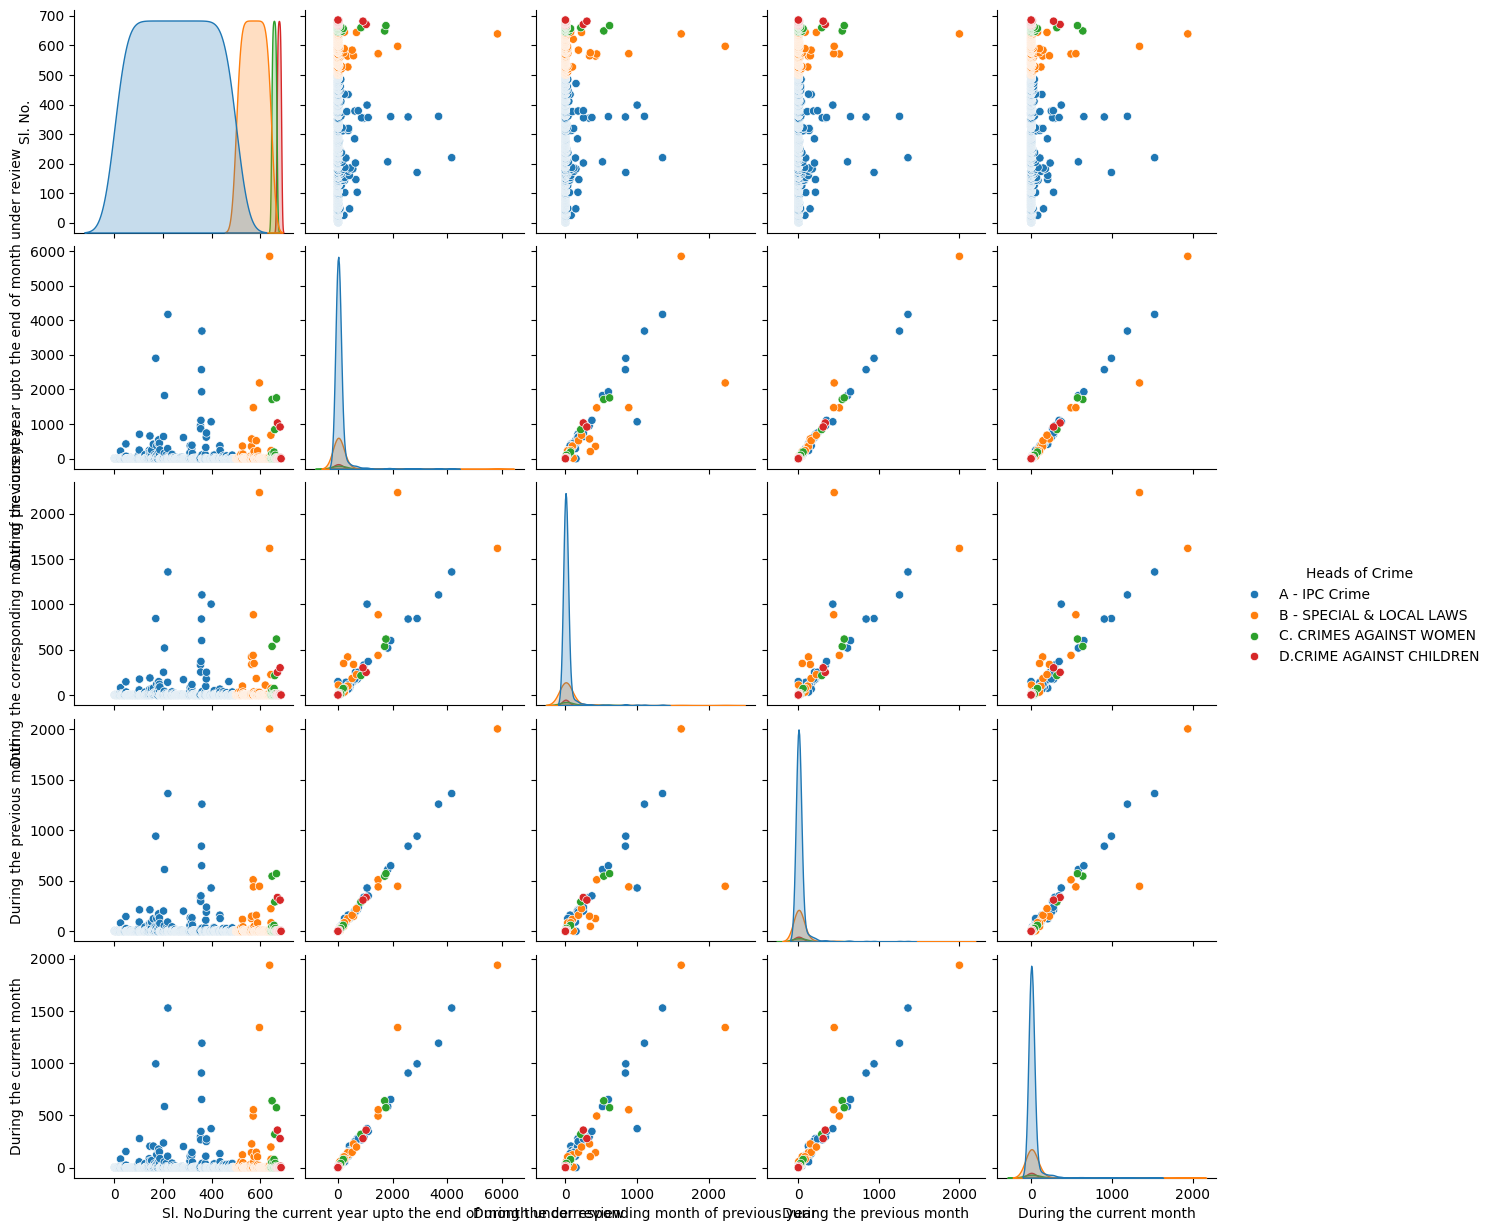

In [48]:
sns.pairplot(df,hue='Heads of Crime')

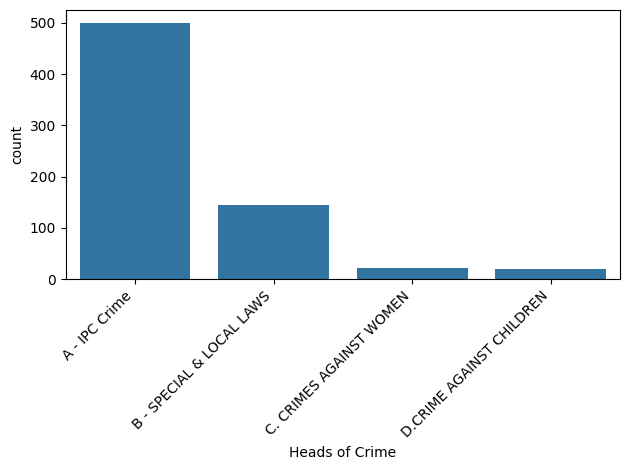

In [49]:
sns.countplot(x = df['Heads of Crime'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
df['Heads of Crime'].value_counts()

Heads of Crime
A - IPC Crime               500
B - SPECIAL & LOCAL LAWS    145
C. CRIMES AGAINST WOMEN      22
D.CRIME AGAINST CHILDREN     19
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Heads of Crime'] = encoder.fit_transform(df['Heads of Crime'])

In [52]:
df['Heads of Crime'].value_counts()

Heads of Crime
0    500
1    145
2     22
3     19
Name: count, dtype: int64

In [53]:
selected_columns = df[['During the current year upto the end of month under review', 'During the corresponding month of previous year', 'During the previous month', 'During the current month']]
corr = selected_columns.corr()
corr

,During the current year upto the end of month under review,During the corresponding month of previous year,During the previous month,During the current month
During the current year upto the end of month under review,1.000000,0.894092,0.995678,0.986062
During the corresponding month of previous year,0.894092,1.000000,0.859892,0.943969
During the previous month,0.995678,0.859892,1.000000,0.967919
During the current month,0.986062,0.943969,0.967919,1.000000


<Axes: >

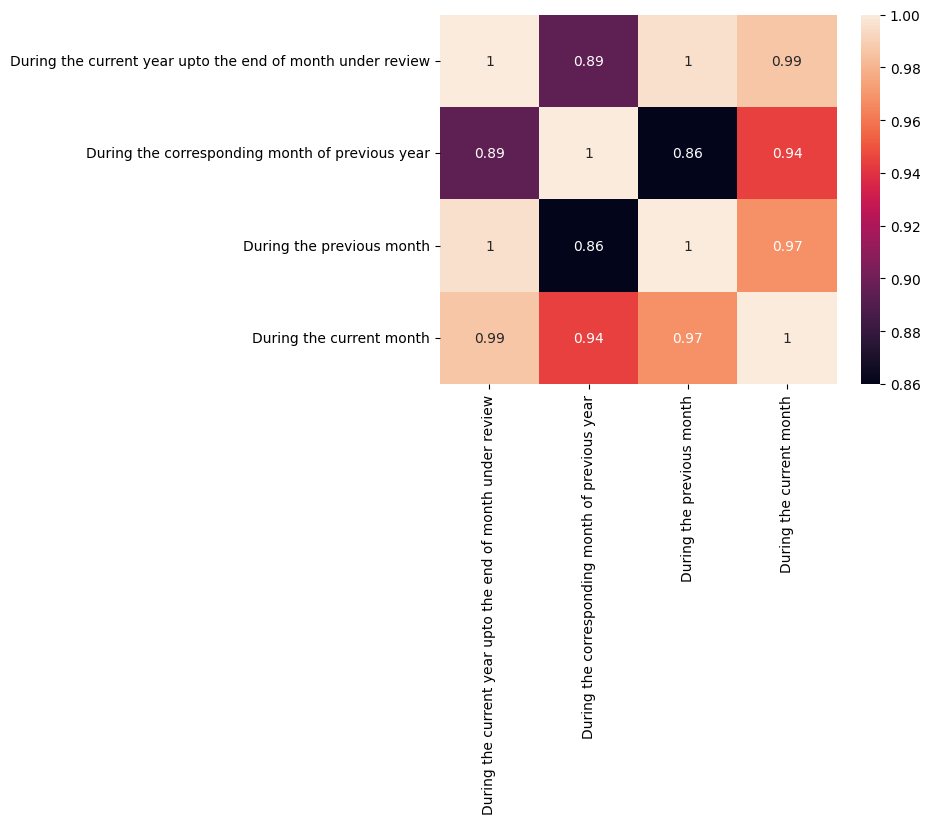

In [54]:
sns.heatmap(corr,annot=True)

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [56]:
X = df.drop('Heads of Crime',axis=1)
y = df['Heads of Crime']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [58]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [59]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [60]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.97      1.00      0.98        30
           2       0.50      0.75      0.60         4
           3       1.00      0.25      0.40         4

    accuracy                           0.97       172
   macro avg       0.87      0.75      0.74       172
weighted avg       0.98      0.97      0.97       172



In [61]:
accuracy_score(y_pred,y_test)

0.9709302325581395

In [62]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[133,   1,   0,   0],
       [  0,  30,   0,   0],
       [  1,   0,   3,   0],
       [  0,   0,   3,   1]])

<Axes: >

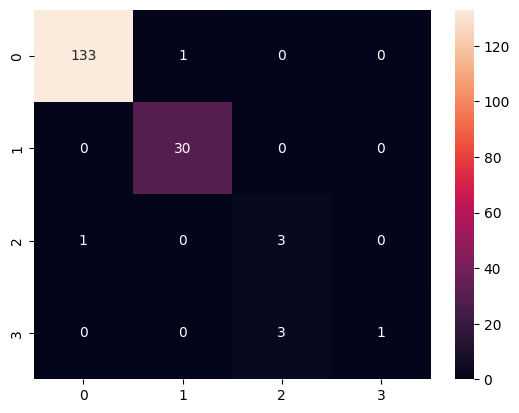

In [63]:
sns.heatmap(cm,annot=True, fmt='g')

In [64]:
df1=df[['Major Head']]
df1

,Major Head
0,106
1,106
2,106
3,106
4,106
...,...
681,125
682,60
683,91
684,49


In [65]:
df['Major Head'].value_counts()

Major Head
97     49
163    27
106    25
98     25
54     25
       ..
22      1
79      1
136     1
135     1
144     1
Name: count, Length: 171, dtype: int64

In [66]:
x = df.drop('Major Head', axis=1)
y = df['Major Head']

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=686)

In [68]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred_tree=tree.predict(X_test)
y_pred_tree

array([  3,  29,  33,  86,  33,  16,  99,  98, 158,  13,   0,  98,  59,
        16,  54, 163,   0, 139,  98,  24,  97, 154,  76,  16,  74,  53,
        69, 110,  34,  13, 114, 169,  12,  61, 163,  92,  97, 106,  15,
        97, 167,  43,  16,   0, 103,  97, 163,  53, 158, 160,  98,  98,
        78,  44,  45,  13,  77,  13,  54,  88, 120,  97,  43, 161, 116,
       132,  15,  61,  98, 163,  15,   6,  25,  16,  54,  27,   3,  61,
        98,  57,  97,  97,  25, 112, 116,   9,  46, 154,  33, 163,  13,
         0, 106, 149, 106,  15, 127,  55,  12, 147,  61,  81,  97,  78,
        29,  78,  13, 154, 163,  46, 106, 122,  98,  46,  17,  17,  16,
       109, 114,  15,  97,  97, 106,  43,  53,  79,  59,  15, 149,  38,
       149, 106,  71,  97, 127, 129, 127, 106, 149, 114,  97,  74,  53,
        12,  65, 120, 167,  97,  12,  17, 154,  97, 169, 134,  28, 149,
       163,  75, 122,   2, 149, 103,  16,  13, 148, 124,  34, 114,  24,
        41,  97,  54])

In [70]:
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree:
Accuracy: 0.7732558139534884
Confusion Matrix:
 [[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         7
          14       0.00      0.00      0.00         1
          15       1.00      0.86      0.92         7
          16       0.86      1.00      0.92         6
          17       0.00      0.00      0.00         0
          19       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [71]:
accuracy_score(y_test,y_pred_tree)

0.7732558139534884

In [72]:
cm = confusion_matrix(y_test,y_pred_tree)
cm

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

<Axes: >

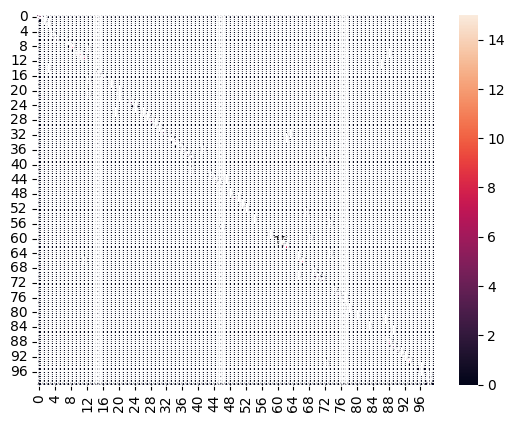

In [73]:
sns.heatmap(cm,annot=True, fmt='g')

In [74]:
for col, le in label_encoders.items():
    df[col] = le.inverse_transform(df[col])

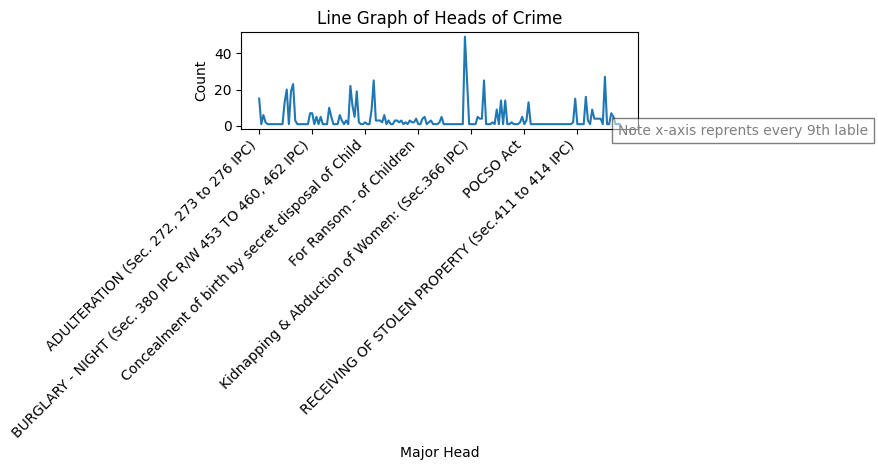

In [75]:
df['Major Head'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Major Head')
plt.ylabel('Count')
plt.title('Line Graph of Heads of Crime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
note_text = "Note x-axis reprents every 9th lable"
plt.text(0.95, 0.05, note_text,
         horizontalalignment='left',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=10, color='gray',
         bbox=dict(facecolor='white', alpha=0.5))
plt.show()